In [1]:
import numpy as np
import matplotlib.pyplot as plt

def langevin_dynamics(n_beads, time_steps, dt, temperature, friction_coefficient, spring_constant):
    positions = np.zeros((n_beads, time_steps))
    velocities = np.zeros((n_beads, time_steps))

    for t in range(1, time_steps):
        # Langevin equation for each bead
        random_force = np.random.normal(0, np.sqrt(2 * temperature * friction_coefficient / dt), n_beads)
        damping_force = -friction_coefficient * velocities[:, t-1]
        spring_force = -spring_constant * (positions[:, t-1] - np.roll(positions[:, t-1], 1))
        
        total_force = random_force + damping_force + spring_force
        
        # Update velocities using Euler method
        velocities[:, t] = velocities[:, t-1] + (total_force / n_beads) * dt
        
        # Update positions using Euler method
        positions[:, t] = positions[:, t-1] + velocities[:, t] * dt

    return positions, velocities




[[ 0.00000000e+00  1.17450136e-03  2.40442154e-03 ...  7.68556387e+00
   7.67530884e+00  7.66514125e+00]
 [ 0.00000000e+00  5.90592554e-04  2.57677305e-04 ...  1.22335798e+01
   1.22458761e+01  1.22584127e+01]
 [ 0.00000000e+00  9.94938745e-04  1.91900937e-03 ...  9.40933728e+00
   9.46175941e+00  9.51485382e+00]
 ...
 [ 0.00000000e+00 -3.45468942e-04 -1.08447134e-03 ...  6.27225527e+00
   6.29457508e+00  6.31708038e+00]
 [ 0.00000000e+00  1.95730882e-04 -3.32331138e-04 ... -2.21569280e+00
  -2.20616185e+00 -2.19706091e+00]
 [ 0.00000000e+00 -2.88341156e-04 -4.87993285e-04 ... -2.18518331e+00
  -2.20000695e+00 -2.21560192e+00]]


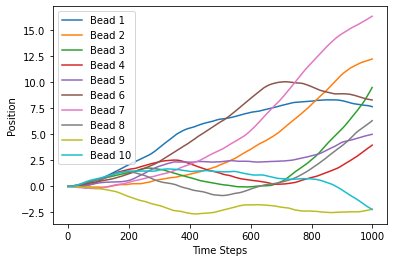

In [3]:
# Parameters
n_beads = 10
time_steps = 1000
dt = 0.01
temperature = 300  # in Kelvin
friction_coefficient = 0.1
spring_constant = 1.0

# Run Langevin dynamics simulation
positions, velocities = langevin_dynamics(n_beads, time_steps, dt, temperature, friction_coefficient, spring_constant)
print(positions)
# Plot results
for i in range(n_beads):
    plt.plot(positions[i, :], label=f"Bead {i+1}")

plt.xlabel('Time Steps')
plt.ylabel('Position')
plt.legend()
plt.show()